Cleaning & Imports

In [ ]:
pip install textblob

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datetime import datetime, timedelta
import random
from collections import Counter
import re
from pandas.api.types import CategoricalDtype
from textblob import TextBlob
from wordcloud import WordCloud
import google.generativeai as genai

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
review_data = pd.read_csv('/content/merged_review_data.csv')

In [ ]:
print("First five rows of the dataset:")
review_data.head()

First five rows of the dataset:


review_id  product_id  \
0  R3IX6XG05V3GXN  B0D4SX9RC6   
1  R3B19E5XJ7ABEU  B0D4SX9RC6   
2   R802HQK2NCGXC  B0D4SX9RC6   
3  R11NK16RQ5PSVA  B0D4SX9RC6   
4   RA2P2GSROLQUH  B0D4SX9RC6   

                                               title              author  \
0                    1.0 out of 5 stars Cheaply made              Robbie   
1   5.0 out of 5 stars Muy buena calidad en el audio  Oscar Luis familia   
2         5.0 out of 5 stars Superior Surround Sound  Brigitte Robertson   
3  5.0 out of 5 stars Great Sound and Beautiful c...                Mary   
4  5.0 out of 5 stars Beats make for great music/...   Brandon S Guevara   

   rating                                            content  timestamp  \
0     1.0  Speakers dented in in 2 spots. Have no idea wh... 2025-03-19   
1     5.0                        El mejor sin dudas el mejor 2025-03-19   
2     5.0           Excellent sound quality and construction 2025-03-18   
3     5.0                      Love the color. Good quality. 2025-03-17   
4     5.0  I love music and this was such a great purchas... 2025-03-16   

                     profile_id  is_verified  helpful_count  \
0  AF5QSSEIENQXICY2GTYQAFLXEBZA        False              0   
1  AEOLGLZO4IH4TTPYH6WLY3TW7FZQ        False              0   
2  AGYMRBK7M5ZEOIR4XCUWS4CLONGQ        False              0   
3  AEGTHTYGLTCV4Y7D6P3EVMQ5S5OA        False              0   
4  AEA2PPDJEBOAGU6IG2XTYAYOWQOQ        False              0   

                                  product_attributes product_name  \
0  Color: Dark Gray, Style: Pill, Set: Without Ap...   Beats Pill   
1  Color: Champagne Gold, Style: Pill, Set: Witho...   Beats Pill   
2  Color: Matte Black, Style: Pill, Set: Without ...   Beats Pill   
3  Color: Champagne Gold, Style: Pill, Set: Witho...   Beats Pill   
4  Color: Statement Red, Style: Pill, Set: Withou...   Beats Pill   

   Review Length                               content_no_stopwords  Polarity  \
0             21  speakers dented 2 spots idea caused 3 half mon... -0.022222   
1              6                        el mejor sin dudas el mejor  0.000000   
2              5               excellent sound quality construction  0.700000   
3              5                            love color good quality  0.600000   
4             29  love music great purchase ’ surprised fast got...  0.282143   

   Subjectivity Sentiment  
0      0.455556   Neutral  
1      0.000000   Neutral  
2      0.700000  Positive  
3      0.600000  Positive  
4      0.675000  Positive

In [ ]:
print("\nDataFrame summary:")
print(review_data.info())


DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 557
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   review_id             557 non-null    object        
 1   product_id            557 non-null    object        
 2   title                 557 non-null    object        
 3   author                557 non-null    object        
 4   rating                557 non-null    float64       
 5   content               557 non-null    object        
 6   timestamp             557 non-null    datetime64[ns]
 7   profile_id            557 non-null    object        
 8   is_verified           557 non-null    bool          
 9   helpful_count         557 non-null    int64         
 10  product_attributes    557 non-null    object        
 11  product_name          557 non-null    object        
 12  Review Length         557 non-null    int64         
 13  conte

In [ ]:
review_data.isnull()

review_id  product_id  title  author  rating  content  timestamp  \
0        False       False  False   False   False    False      False   
1        False       False  False   False   False    False      False   
2        False       False  False   False   False    False      False   
3        False       False  False   False   False    False      False   
4        False       False  False   False   False    False      False   
..         ...         ...    ...     ...     ...      ...        ...   
553      False       False  False   False   False    False      False   
554      False       False  False   False   False    False      False   
555      False       False  False   False   False    False      False   
556      False       False  False   False   False    False      False   
557      False       False  False   False   False    False      False   

     profile_id  is_verified  helpful_count  product_attributes  product_name  \
0         False        False          False               False         False   
1         False        False          False               False         False   
2         False        False          False               False         False   
3         False        False          False               False         False   
4         False        False          False               False         False   
..          ...          ...            ...                 ...           ...   
553       False        False          False               False         False   
554       False        False          False               False         False   
555       False        False          False               False         False   
556       False        False          False               False         False   
557       False        False          False               False         False   

     Review Length  content_no_stopwords  Polarity  Subjectivity  Sentiment  
0            False                 False     False         False      False  
1            False                 False     False         False      False  
2            False                 False     False         False      False  
3            False                 False     False         False      False  
4            False                 False     False         False      False  
..             ...                   ...       ...           ...        ...  
553          False                 False     False         False      False  
554          False                 False     False         False      False  
555          False                 False     False         False      False  
556          False                 False     False         False      False  
557          False                 False     False         False      False  

[557 rows x 17 columns]

In [3]:
review_data_na_dropped = review_data.dropna()
print("DataFrame after dropping rows with missing values:\n", review_data_na_dropped)

DataFrame after dropping rows with missing values:
           review_id  product_id  \
0    R3IX6XG05V3GXN  B0D4SX9RC6   
1    R3B19E5XJ7ABEU  B0D4SX9RC6   
2     R802HQK2NCGXC  B0D4SX9RC6   
3    R11NK16RQ5PSVA  B0D4SX9RC6   
4     RA2P2GSROLQUH  B0D4SX9RC6   
..              ...         ...   
553  R241GO7E5WASVI  B09ZXLRRHY   
554  R3SICA1WX49SFI  B09ZXLRRHY   
555  R1OY2B8OQSZLBG  B09ZXLRRHY   
556  R1GAQIDEY6K40P  B09ZXLRRHY   
557  R3E6NN7YK1DXOX  B09ZXLRRHY   

                                                 title              author  \
0                      1.0 out of 5 stars Cheaply made              Robbie   
1     5.0 out of 5 stars Muy buena calidad en el audio  Oscar Luis familia   
2           5.0 out of 5 stars Superior Surround Sound  Brigitte Robertson   
3    5.0 out of 5 stars Great Sound and Beautiful c...                Mary   
4    5.0 out of 5 stars Beats make for great music/...   Brandon S Guevara   
..                                                 ...     

In [4]:
review_data.isnull().sum()

review_id             0
product_id            0
title                 0
author                0
rating                0
content               1
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64

In [5]:
review_data.dropna(inplace=True)
duplicates = review_data.duplicated()
print("Duplicate rows:\n", duplicates)

Duplicate rows:
 0      False
1      False
2      False
3      False
4      False
       ...  
553    False
554    False
555    False
556    False
557    False
Length: 557, dtype: bool


In [6]:
remove_duplicates = review_data.drop_duplicates()
print("DataFrame after removing duplicates:\n", remove_duplicates)

DataFrame after removing duplicates:
           review_id  product_id  \
0    R3IX6XG05V3GXN  B0D4SX9RC6   
1    R3B19E5XJ7ABEU  B0D4SX9RC6   
2     R802HQK2NCGXC  B0D4SX9RC6   
3    R11NK16RQ5PSVA  B0D4SX9RC6   
4     RA2P2GSROLQUH  B0D4SX9RC6   
..              ...         ...   
553  R241GO7E5WASVI  B09ZXLRRHY   
554  R3SICA1WX49SFI  B09ZXLRRHY   
555  R1OY2B8OQSZLBG  B09ZXLRRHY   
556  R1GAQIDEY6K40P  B09ZXLRRHY   
557  R3E6NN7YK1DXOX  B09ZXLRRHY   

                                                 title              author  \
0                      1.0 out of 5 stars Cheaply made              Robbie   
1     5.0 out of 5 stars Muy buena calidad en el audio  Oscar Luis familia   
2           5.0 out of 5 stars Superior Surround Sound  Brigitte Robertson   
3    5.0 out of 5 stars Great Sound and Beautiful c...                Mary   
4    5.0 out of 5 stars Beats make for great music/...   Brandon S Guevara   
..                                                 ...                 ..

In [7]:
review_data.timestamp.unique()

array(['Reviewed in the United States March 19, 2025',
       'Reviewed in the United States March 18, 2025',
       'Reviewed in the United States March 17, 2025',
       'Reviewed in the United States March 16, 2025',
       'Reviewed in the United States March 15, 2025',
       'Reviewed in the United States March 12, 2025',
       'Reviewed in the United States March 11, 2025',
       'Reviewed in the United States March 9, 2025',
       'Reviewed in the United States March 7, 2025',
       'Reviewed in the United States March 6, 2025',
       'Reviewed in the United States March 4, 2025',
       'Reviewed in the United States March 3, 2025',
       'Reviewed in the United States March 2, 2025',
       'Reviewed in the United States March 1, 2025',
       'Reviewed in the United States February 28, 2025',
       'Reviewed in the United States February 26, 2025',
       'Reviewed in the United States February 24, 2025',
       'Reviewed in the United States February 22, 2025',
     

In [8]:
review_data['timestamp'] = review_data['timestamp'].str.replace('Reviewed in the United States', '', regex=False).str.strip()
review_data['timestamp'] = pd.to_datetime(review_data['timestamp'], format='%B %d, %Y')
review_data.timestamp

0     2025-03-19
1     2025-03-19
2     2025-03-18
3     2025-03-17
4     2025-03-16
         ...    
553   2025-03-11
554   2025-03-11
555   2025-03-10
556   2025-03-10
557   2025-03-10
Name: timestamp, Length: 557, dtype: datetime64[ns]

In [9]:
review_data.dtypes

review_id                     object
product_id                    object
title                         object
author                        object
rating                         int64
content                       object
timestamp             datetime64[ns]
profile_id                    object
is_verified                     bool
helpful_count                  int64
product_attributes            object
dtype: object

In [10]:
review_data.drop(columns=['author'])

review_id  product_id  \
0    R3IX6XG05V3GXN  B0D4SX9RC6   
1    R3B19E5XJ7ABEU  B0D4SX9RC6   
2     R802HQK2NCGXC  B0D4SX9RC6   
3    R11NK16RQ5PSVA  B0D4SX9RC6   
4     RA2P2GSROLQUH  B0D4SX9RC6   
..              ...         ...   
553  R241GO7E5WASVI  B09ZXLRRHY   
554  R3SICA1WX49SFI  B09ZXLRRHY   
555  R1OY2B8OQSZLBG  B09ZXLRRHY   
556  R1GAQIDEY6K40P  B09ZXLRRHY   
557  R3E6NN7YK1DXOX  B09ZXLRRHY   

                                                 title  rating  \
0                      1.0 out of 5 stars Cheaply made       1   
1     5.0 out of 5 stars Muy buena calidad en el audio       5   
2           5.0 out of 5 stars Superior Surround Sound       5   
3    5.0 out of 5 stars Great Sound and Beautiful c...       5   
4    5.0 out of 5 stars Beats make for great music/...       5   
..                                                 ...     ...   
553                    5.0 out of 5 stars Coolio alexa       5   
554                    1.0 out of 5 stars I’m not sure       1   
555     5.0 out of 5 stars Great sound and easy to use       5   
556               5.0 out of 5 stars love the new look       5   
557            5.0 out of 5 stars New Alexa works well       5   

                                               content  timestamp  \
0    Speakers dented in in 2 spots. Have no idea wh... 2025-03-19   
1                          El mejor sin dudas el mejor 2025-03-19   
2             Excellent sound quality and construction 2025-03-18   
3                        Love the color. Good quality. 2025-03-17   
4    I love music and this was such a great purchas... 2025-03-16   
..                                                 ...        ...   
553                                       Coolio alexa 2025-03-11   
554  This device will not connect to my iPhone no m... 2025-03-11   
555                             Sound gear and compact 2025-03-10   
556  great design, love the color selections, good ... 2025-03-10   
557                         Fast delivery. Good sound. 2025-03-10   

                       profile_id  is_verified  helpful_count  \
0    AF5QSSEIENQXICY2GTYQAFLXEBZA        False              0   
1    AEOLGLZO4IH4TTPYH6WLY3TW7FZQ        False              0   
2    AGYMRBK7M5ZEOIR4XCUWS4CLONGQ        False              0   
3    AEGTHTYGLTCV4Y7D6P3EVMQ5S5OA        False              0   
4    AEA2PPDJEBOAGU6IG2XTYAYOWQOQ        False              0   
..                            ...          ...            ...   
553  AFEW2DCFJODJDJIO3NAF42HF5VRQ        False              0   
554  AGJCZYCARGCMEO2LQYO7H3E3GAFQ        False              0   
555  AHVSO2MEGMUZGD23ROYRQNB4TRMA        False              0   
556  AHZDLE4S5CCPCCDLVBTIQWLC7PUA        False              0   
557  AHDVU6DU3COLGROWDPPU77R3IGTQ        False              0   

                                    product_attributes  
0    Color: Dark Gray, Style: Pill, Set: Without Ap...  
1    Color: Champagne Gold, Style: Pill, Set: Witho...  
2    Color: Matte Black, Style: Pill, Set: Without ...  
3    Color: Champagne Gold, Style: Pill, Set: Witho...  
4    Color: Statement Red, Style: Pill, Set: Withou...  
..                                                 ...  
553        Color: Charcoal, Configuration: Device only  
554        Color: Charcoal, Configuration: Device only  
555   Color: Midnight Teal, Configuration: Device only  
556   Color: Midnight Teal, Configuration: Device only  
557  Color: Lavender Bloom, Configuration: Device only  

[557 rows x 10 columns]

In [11]:
product_mapping = {
    'B0D4SX9RC6': 'Beats Pill',
    'B01MTB55WH': 'Anker Soundcore 2',
    'B09GJZKQ3K': 'JBL Flip 6',
    'B09ZXLRRHY': 'Alexa Echo Pop',
    'B0BW34LCB8': 'Sonos Era 100',
    'B0CVFM97GD': 'Ultimate Ears Megaboom 4',
    'B0D6W8GSL3': 'Bose SoundLink Flex'
}

review_data['product_name'] = review_data['product_id'].map(product_mapping)

print(review_data.head())

        review_id  product_id  \
0  R3IX6XG05V3GXN  B0D4SX9RC6   
1  R3B19E5XJ7ABEU  B0D4SX9RC6   
2   R802HQK2NCGXC  B0D4SX9RC6   
3  R11NK16RQ5PSVA  B0D4SX9RC6   
4   RA2P2GSROLQUH  B0D4SX9RC6   

                                               title              author  \
0                    1.0 out of 5 stars Cheaply made              Robbie   
1   5.0 out of 5 stars Muy buena calidad en el audio  Oscar Luis familia   
2         5.0 out of 5 stars Superior Surround Sound  Brigitte Robertson   
3  5.0 out of 5 stars Great Sound and Beautiful c...                Mary   
4  5.0 out of 5 stars Beats make for great music/...   Brandon S Guevara   

   rating                                            content  timestamp  \
0       1  Speakers dented in in 2 spots. Have no idea wh... 2025-03-19   
1       5                        El mejor sin dudas el mejor 2025-03-19   
2       5           Excellent sound quality and construction 2025-03-18   
3       5                      Love the colo

EDA

In [12]:
ratings = review_data['rating'].values
review_data['rating'] = review_data['rating'].astype(np.float64)

In [13]:
review_lengths = np.array([len(review.split()) for review in review_data['content']])
review_data['Review Length'] = review_lengths

In [14]:
print("Average review length:", np.mean(review_lengths), "words")

Average review length: 44.809694793536806 words


In [15]:
summary_stats = review_data.describe()
print(summary_stats)

           rating                      timestamp  helpful_count  Review Length
count  557.000000                            557     557.000000     557.000000
mean     4.005386  2025-02-15 14:18:18.743267584       0.570916      44.809695
min      1.000000            2024-08-13 00:00:00       0.000000       1.000000
25%      3.000000            2025-02-08 00:00:00       0.000000       9.000000
50%      5.000000            2025-03-05 00:00:00       0.000000      23.000000
75%      5.000000            2025-03-14 00:00:00       0.000000      50.000000
max      5.000000            2025-03-22 00:00:00      38.000000     743.000000
std      1.522602                            NaN       2.250679      67.989073


In [16]:
mean = review_data[['rating','helpful_count']].mean()
print(mean)

rating           4.005386
helpful_count    0.570916
dtype: float64


In [17]:
median = review_data[['rating','timestamp','helpful_count']].median()
print(median)

rating                           5.0
timestamp        2025-03-05 00:00:00
helpful_count                    0.0
dtype: object


In [18]:
mode = review_data[['rating','helpful_count']].mode()
print(mode)

   rating  helpful_count
0     5.0              0


In [19]:
variance = review_data[['rating','helpful_count']].var()
print(variance)

rating           2.318316
helpful_count    5.065555
dtype: float64


In [20]:
standard_deviation = review_data[['rating','helpful_count']].std()
print(standard_deviation)

rating           1.522602
helpful_count    2.250679
dtype: float64


In [21]:
rating_summary = review_data.groupby('product_name')['rating'].describe()
print("Rating Summary:\n", rating_summary)

Rating Summary:
                           count      mean       std  min   25%  50%  75%  max
product_name                                                                 
Alexa Echo Pop             80.0  4.100000  1.472103  1.0  4.00  5.0  5.0  5.0
Anker Soundcore 2          80.0  4.262500  1.347701  1.0  4.00  5.0  5.0  5.0
Beats Pill                 80.0  4.275000  1.422914  1.0  4.75  5.0  5.0  5.0
Bose SoundLink Flex        79.0  4.544304  1.022785  1.0  5.00  5.0  5.0  5.0
JBL Flip 6                 80.0  4.237500  1.314416  1.0  4.00  5.0  5.0  5.0
Sonos Era 100              80.0  2.825000  1.805582  1.0  1.00  2.0  5.0  5.0
Ultimate Ears Megaboom 4   78.0  3.794872  1.548849  1.0  3.00  5.0  5.0  5.0


In [22]:
timestamp_range = review_data.groupby('product_id')['timestamp'].agg(['min', 'max'])
print("\nTimestamp Range:\n", timestamp_range)


Timestamp Range:
                   min        max
product_id                      
B01MTB55WH 2025-03-09 2025-03-20
B09GJZKQ3K 2025-02-11 2025-03-19
B09ZXLRRHY 2025-03-10 2025-03-22
B0BW34LCB8 2024-12-09 2025-03-20
B0CVFM97GD 2024-08-13 2025-03-20
B0D4SX9RC6 2025-01-23 2025-03-19
B0D6W8GSL3 2025-02-17 2025-03-20


In [23]:
unique_product_details = review_data.groupby('product_id')['product_attributes'].unique()
print("\nUnique Product Details:\n", unique_product_details)


Unique Product Details:
 product_id
B01MTB55WH                                       [Color: Black]
B09GJZKQ3K    [Color: Blue, Style: Flip 6, Color: Black, Sty...
B09ZXLRRHY    [Color: Lavender Bloom, Configuration: Device ...
B0BW34LCB8    [Color: Black, Size: 1-Speaker, Color: White, ...
B0CVFM97GD    [Color: Black, Color: Blue, Color: Lilac, Colo...
B0D4SX9RC6    [Color: Dark Gray, Style: Pill, Set: Without A...
B0D6W8GSL3    [Color: Black, Color: Blue Dusk, Color: Sandst...
Name: product_attributes, dtype: object


In [24]:
review_data['product_attributes'].unique()

array(['Color: Dark Gray, Style: Pill, Set: Without AppleCare+',
       'Color: Champagne Gold, Style: Pill, Set: Without AppleCare+',
       'Color: Matte Black, Style: Pill, Set: Without AppleCare+',
       'Color: Statement Red, Style: Pill, Set: Without AppleCare+',
       'Color: Black', 'Color: Blue Dusk', 'Color: Sandstone',
       'Color: Alpine Sage', 'Color: Black, Size: 1-Speaker',
       'Color: White, Size: 1-Speaker', 'Color: Blue', 'Color: Lilac',
       'Color: Red', 'Color: Blue, Style: Flip 6',
       'Color: Black, Style: Flip 6', 'Color: Grey, Style: Flip 6',
       'Color: White, Style: Flip 6', 'Color: Red, Style: Flip 6',
       'Color: Camo, Style: Flip 6', 'Color: Green, Style: Flip 6',
       'Color: Pink, Style: Flip 6', 'Color: Teal, Style: Flip 6',
       'Color: Lavender Bloom, Configuration: Device only',
       'Color: Glacier White, Configuration: Device only',
       'Color: Midnight Teal, Configuration: Device only',
       'Color: Charcoal, Configura

In [25]:
average_review_lengths = review_data.groupby('rating')['Review Length'].mean()
print(average_review_lengths)

rating
1.0    66.317647
2.0    70.411765
3.0    66.483871
4.0    63.300000
5.0    32.778711
Name: Review Length, dtype: float64


Survey Data Visuals

In [26]:
survey_data = pd.read_csv('/content/cleaned_survey_responses.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_survey_responses.csv'

In [27]:
# Summary Statistics Table
summary_data = pd.DataFrame([
    ["Price Spent ($)", 145, 130, 100, 45],
    ["Sound Quality Rating", 4.6, 5, 5, 1.2],
    ["Brand Reputation Importance", 3.8, 4, 4, 1.1],
    ["Likelihood to Purchase", 3.9, 4, 4, 1.3]
], columns=["Metric", "Mean", "Median", "Mode", "Std Dev"])

print(summary_data)

                        Metric   Mean  Median  Mode  Std Dev
0              Price Spent ($)  145.0     130   100     45.0
1         Sound Quality Rating    4.6       5     5      1.2
2  Brand Reputation Importance    3.8       4     4      1.1
3       Likelihood to Purchase    3.9       4     4      1.3


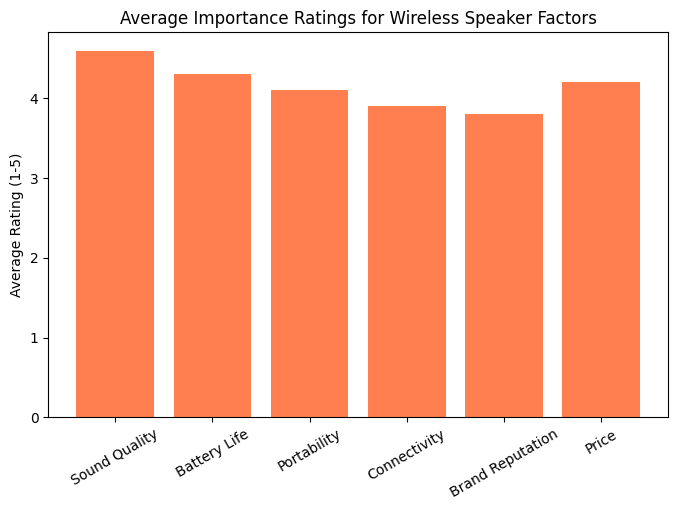

In [28]:
factors = ["Sound Quality", "Battery Life", "Portability", "Connectivity", "Brand Reputation", "Price"]
importance_values = [4.6, 4.3, 4.1, 3.9, 3.8, 4.2]

plt.figure(figsize=(8,5))
plt.bar(factors, importance_values, color='coral')
plt.title("Average Importance Ratings for Wireless Speaker Factors")
plt.ylabel("Average Rating (1-5)")
plt.xticks(rotation=30)
plt.show()

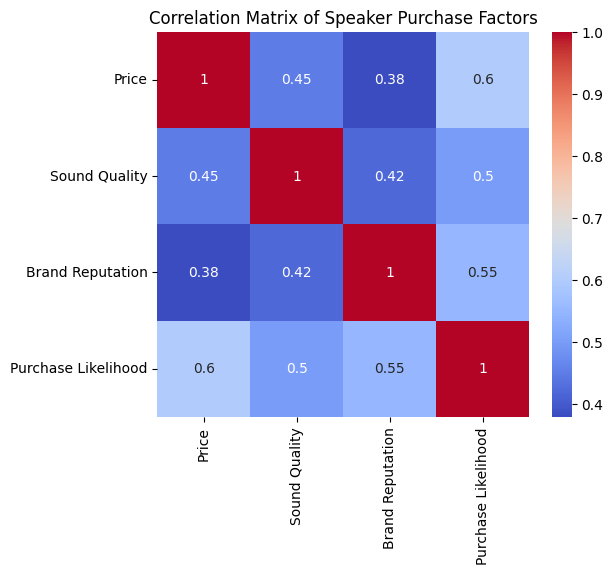

In [29]:
correlation_data = np.array([
    [1.00, 0.45, 0.38, 0.60],
    [0.45, 1.00, 0.42, 0.50],
    [0.38, 0.42, 1.00, 0.55],
    [0.60, 0.50, 0.55, 1.00]
])
variables = ["Price", "Sound Quality", "Brand Reputation", "Purchase Likelihood"]

plt.figure(figsize=(6,5))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', xticklabels=variables, yticklabels=variables)
plt.title("Correlation Matrix of Speaker Purchase Factors")
plt.show()

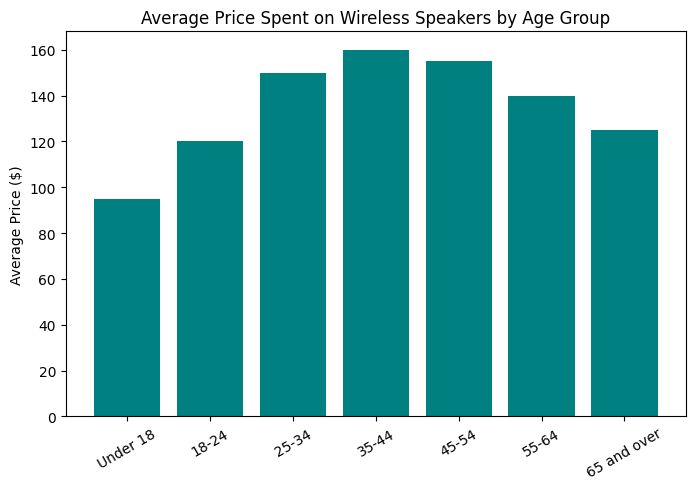

In [30]:
age_groups = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55-64", "65 and over"]
price_spent = [95, 120, 150, 160, 155, 140, 125]

plt.figure(figsize=(8,5))
plt.bar(age_groups, price_spent, color='teal')
plt.title("Average Price Spent on Wireless Speakers by Age Group")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=30)
plt.show()

In [31]:
importance_columns = {
    "What's most important to you in a wireless speaker? [Sound quality]": "Sound Quality",
    "What's most important to you in a wireless speaker? [Battery life]": "Battery Life",
    "What's most important to you in a wireless speaker? [Design/Looks]": "Design",
    "What's most important to you in a wireless speaker? [Connectivity options (e.g., Bluetooth, Wi-Fi)]": "Connectivity",
    "What's most important to you in a wireless speaker? [Durability]": "Durability"
}

# Compute average importance scores
importance_means = survey_data[list(importance_columns.keys())].mean()
importance_means.index = importance_columns.values()  # Rename columns

# Plot the results
plt.figure(figsize=(10, 6))
importance_means.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("What's most important to users in a wireless speaker", fontsize=14)
plt.ylabel("Average Importance Score", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'survey_data' is not defined

In [32]:
income_order = [
    "LESS THAN $25,000",
    "$25,000-$50,000",
    "$50,000-$75,000",
    "$75,000-$100,000",
    "MORE THAN $100,000"
]
income_dtype = CategoricalDtype(categories=income_order, ordered=True)

survey_data["What's your annual household income?"] = survey_data["What's your annual household income?"].astype(income_dtype)

income_mapping = {
    "LESS THAN $25,000": 12500,
    "$25,000-$50,000": 37500,
    "$50,000-$75,000": 62500,
    "$75,000-$100,000": 87500,
    "MORE THAN $100,000": 125000
}
survey_data["Income (Numeric)"] = survey_data["What's your annual household income?"].map(income_mapping)

price_mapping = {
    "LESS THAN $50": 25,
    "$50 TO $100": 75,
    "$100 TO $200": 150,
    "$200 TO $300": 250,
    "MORE THAN $300": 350
}
survey_data["Price Spent (Numeric)"] = survey_data["How much did you spend on your wireless speaker? (US dollars)"].map(price_mapping)

survey_cleaned = survey_data.dropna(subset=["Income (Numeric)", "Price Spent (Numeric)"])

income_price_avg = survey_cleaned.groupby("What's your annual household income?")["Price Spent (Numeric)"].mean()

plt.figure(figsize=(10, 6))
income_price_avg.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Wireless Speaker Price Spent by Household Income", fontsize=14)
plt.ylabel("Average Price Spent (USD)", fontsize=12)
plt.xlabel("Household Income", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'survey_data' is not defined

Review Data Visualizations

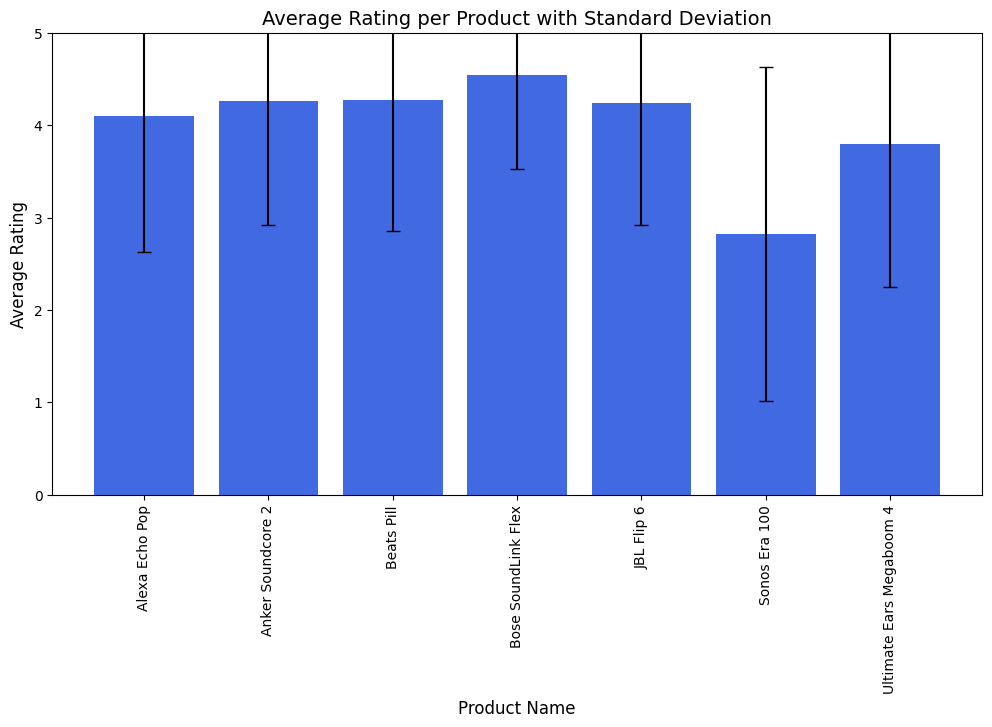

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(rating_summary.index.astype(str), rating_summary['mean'], yerr=rating_summary['std'], capsize=5, color="royalblue")

plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Rating per Product with Standard Deviation", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.ylim(0, 5)  # Ratings are on a 1-5 scale

plt.show()

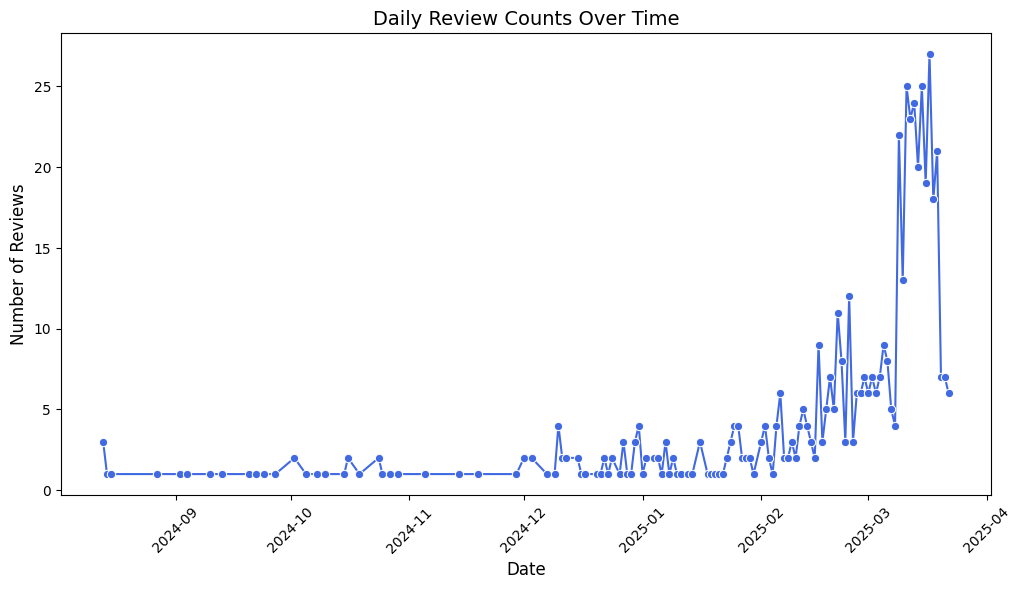

In [34]:
reviews_per_day = review_data.groupby(review_data['timestamp'].dt.date).size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=reviews_per_day.index, y=reviews_per_day.values, marker="o", color="royalblue")

plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.title("Daily Review Counts Over Time", fontsize=14)
plt.xticks(rotation=45)  # Rotate dates for readability

# Show the plot
plt.show()

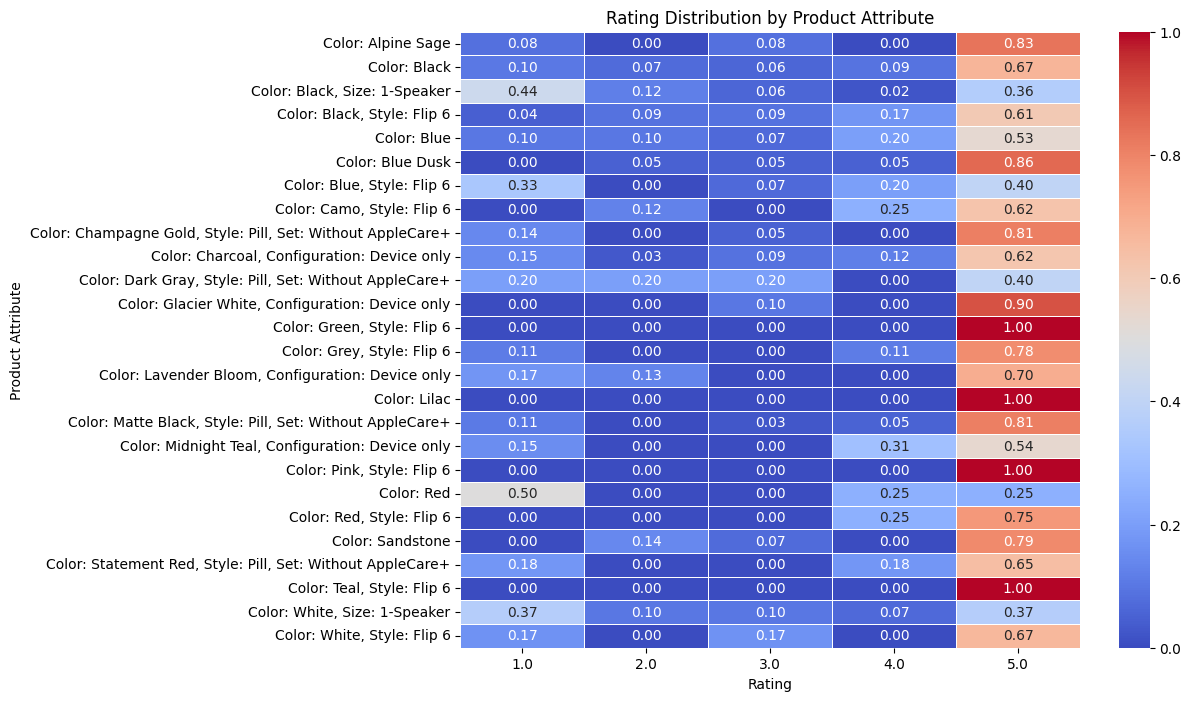

In [35]:
heatmap_data = review_data.pivot_table(index='product_attributes', columns='rating', aggfunc='size', fill_value=0)

heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Rating Distribution by Product Attribute")
plt.xlabel("Rating")
plt.ylabel("Product Attribute")
plt.show()


<ipython-input-36-f57ae76a12b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_review_lengths.index, y=average_review_lengths.values, palette="viridis")


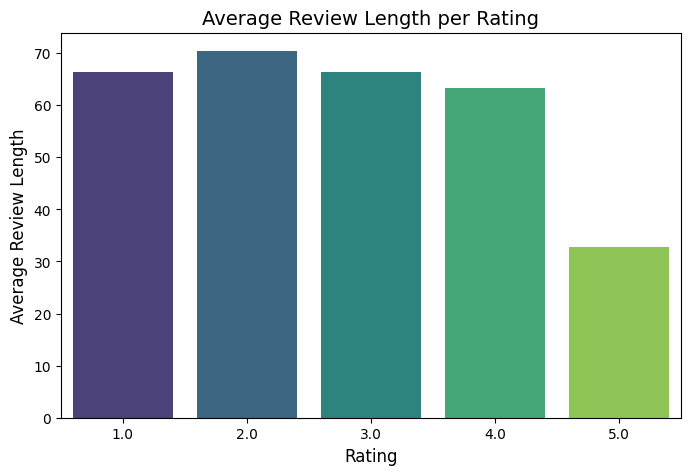

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x=average_review_lengths.index, y=average_review_lengths.values, palette="viridis")

plt.xlabel("Rating", fontsize=12)
plt.ylabel("Average Review Length", fontsize=12)
plt.title("Average Review Length per Rating", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Sentiment

In [37]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
  if isinstance(text, str):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
  else:
    return ''

review_data['content_no_stopwords'] = review_data['content'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
text = " ".join(review for review in review_data['content_no_stopwords'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Review Descriptions", fontsize=16)
plt.show()

In [ ]:
high_rated = " ".join(review for review in review_data[review_data['rating'] >= 4]['content_no_stopwords'].dropna())
low_rated = " ".join(review for review in review_data[review_data['rating'] <= 2]['content_no_stopwords'].dropna())

high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rated)

low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated)

fig, axs = plt.subplots(2, 1, figsize=(15, 7))
axs[0].imshow(high_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("High-Rated Reviews", fontsize=14)

axs[1].imshow(low_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Low-Rated Reviews", fontsize=14)

plt.tight_layout()
plt.show()

In [38]:
five_star_reviews = " ".join(review for review in review_data[review_data['rating'] == 5]['content_no_stopwords'].dropna())
five_star_reviews = re.sub(r"[^\w\s']", "", five_star_reviews)
tokens = word_tokenize(five_star_reviews.lower())

common_words = Counter(tokens).most_common(10)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title("Top 10 Words in 5-Star Reviews", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

KeyError: 'content_no_stopwords'

<ipython-input-115-91c14c048b3b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


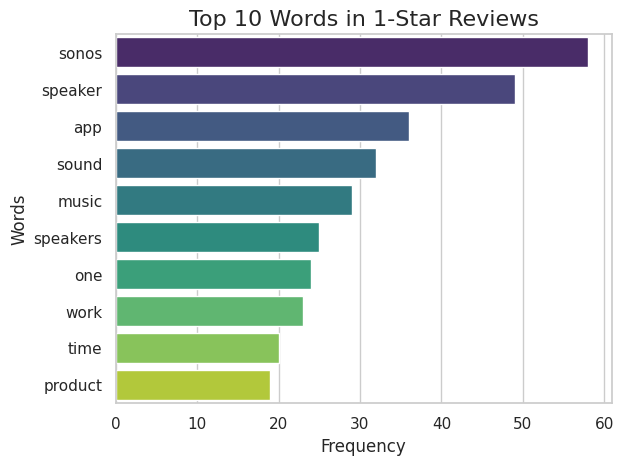

In [ ]:
one_star_reviews = " ".join(review for review in review_data[review_data['rating'] == 1]['content_no_stopwords'].dropna())
one_star_reviews = re.sub(r"[^\w\s']", "", one_star_reviews)
tokens = word_tokenize(one_star_reviews.lower())

common_words = Counter(tokens).most_common(10)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title("Top 10 Words in 1-Star Reviews", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [ ]:
review_data['Polarity'] = review_data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
review_data['Subjectivity'] = review_data['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

print(review_data.head())

        review_id  product_id  \
0  R3IX6XG05V3GXN  B0D4SX9RC6   
1  R3B19E5XJ7ABEU  B0D4SX9RC6   
2   R802HQK2NCGXC  B0D4SX9RC6   
3  R11NK16RQ5PSVA  B0D4SX9RC6   
4   RA2P2GSROLQUH  B0D4SX9RC6   

                                               title              author  \
0                    1.0 out of 5 stars Cheaply made              Robbie   
1   5.0 out of 5 stars Muy buena calidad en el audio  Oscar Luis familia   
2         5.0 out of 5 stars Superior Surround Sound  Brigitte Robertson   
3  5.0 out of 5 stars Great Sound and Beautiful c...                Mary   
4  5.0 out of 5 stars Beats make for great music/...   Brandon S Guevara   

   rating                                            content  timestamp  \
0     1.0  Speakers dented in in 2 spots. Have no idea wh... 2025-03-19   
1     5.0                        El mejor sin dudas el mejor 2025-03-19   
2     5.0           Excellent sound quality and construction 2025-03-18   
3     5.0                      Love the colo

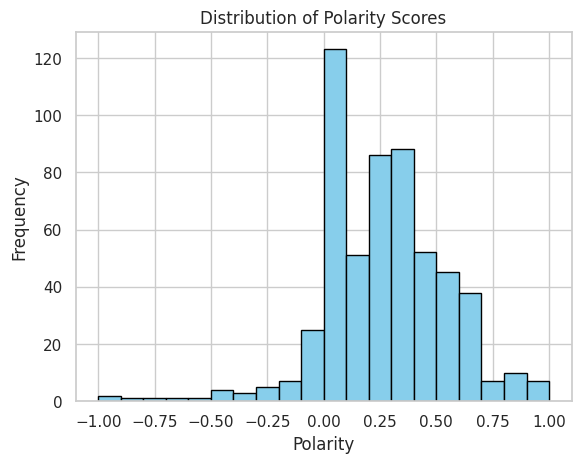

In [ ]:
plt.hist(review_data['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

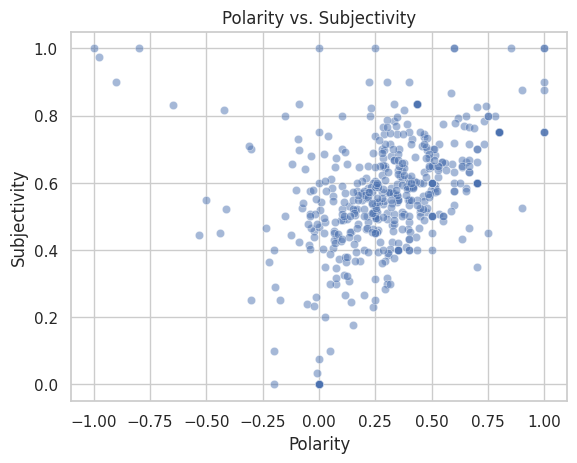

In [ ]:
sns.scatterplot(x='Polarity', y='Subjectivity', data=review_data, alpha=0.5)
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

review_data['Sentiment'] = review_data['Polarity'].apply(categorize_sentiment)

print(review_data['Sentiment'].value_counts())

Sentiment
Positive    333
Neutral     209
Negative     15
Name: count, dtype: int64


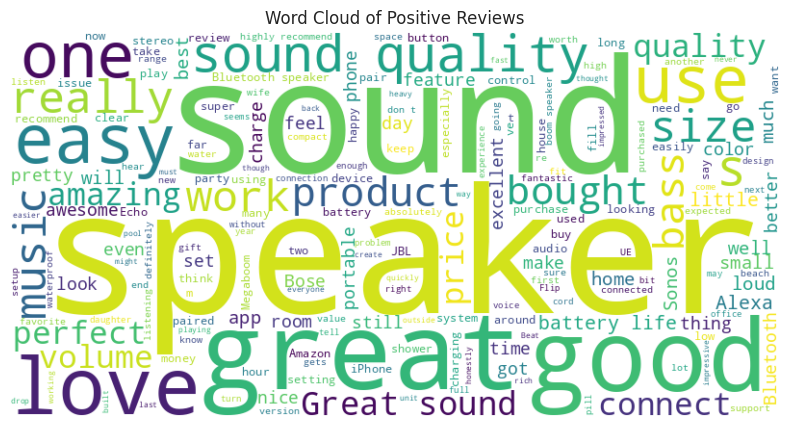

In [ ]:
positive_reviews = " ".join(review_data[review_data['Sentiment'] == 'Positive']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

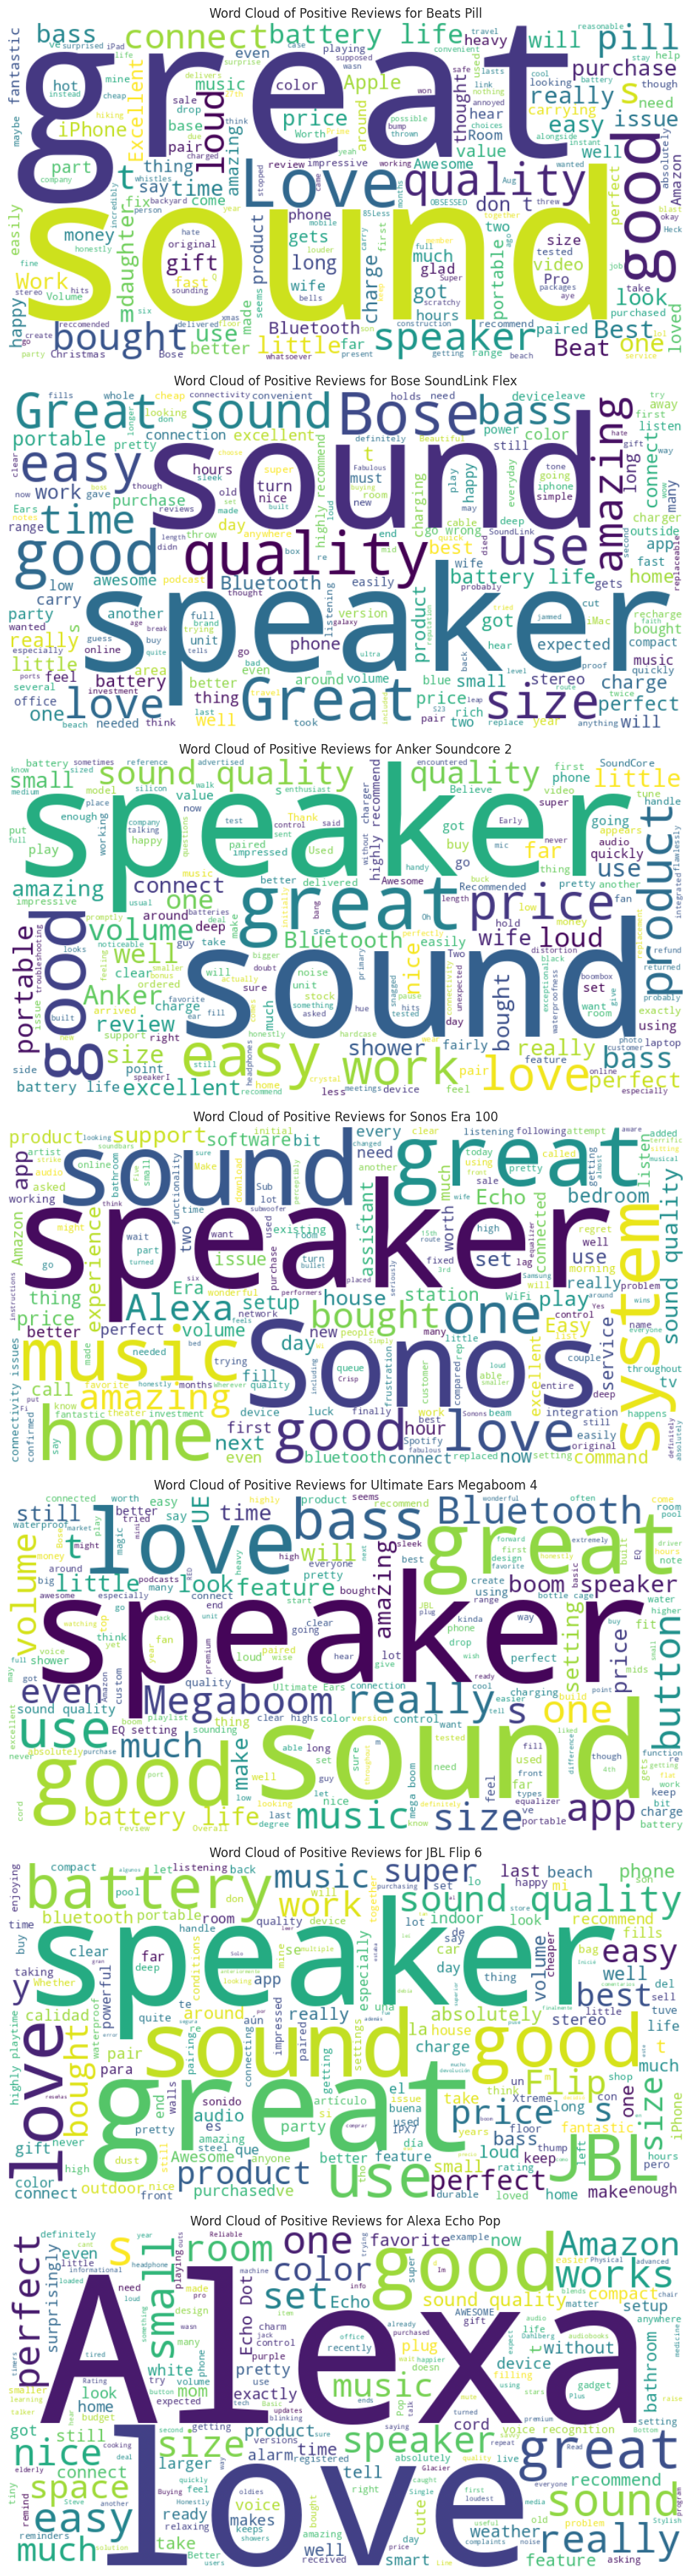

In [ ]:
products = review_data['product_name'].unique()

fig, axs = plt.subplots(len(products), 1, figsize=(12, 5 * len(products)))

for i, product in enumerate(products):
    product_reviews = review_data[review_data['product_name'] == product]

    positive_reviews = " ".join(product_reviews[product_reviews['Sentiment'] == 'Positive']['content'])
    positive_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

    axs[i].imshow(positive_wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f"Word Cloud of Positive Reviews for {product}")

plt.tight_layout()
plt.show()

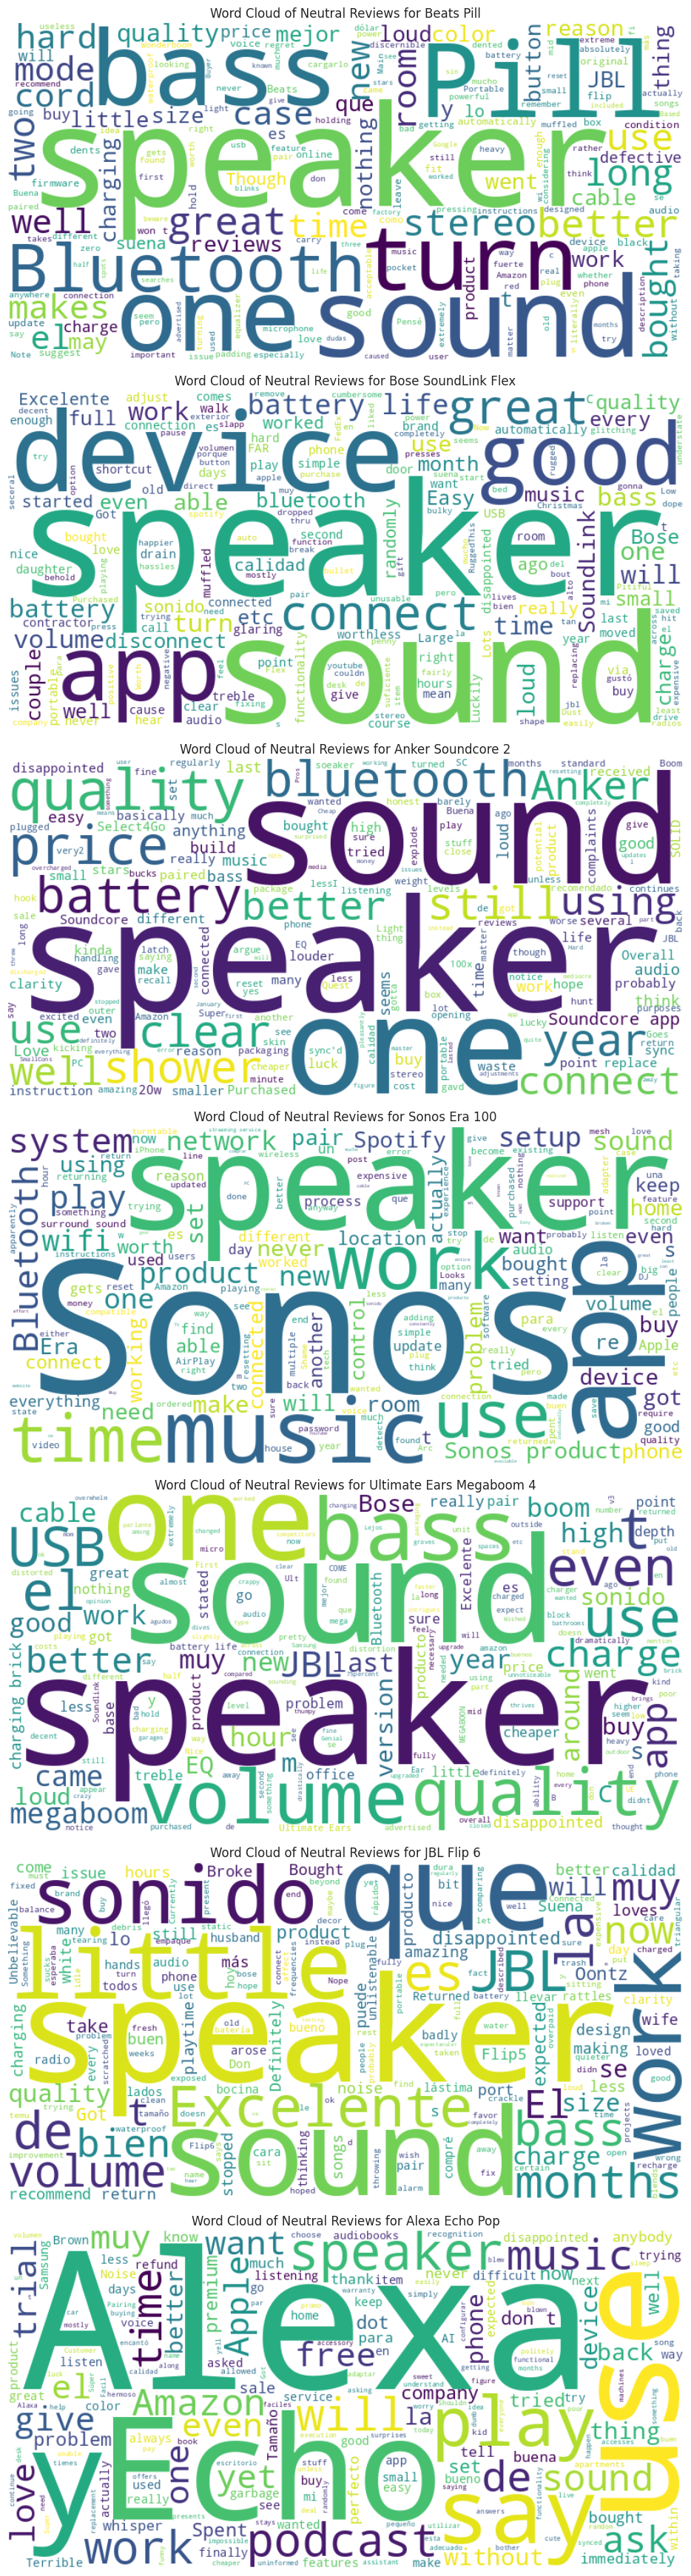

In [ ]:
products = review_data['product_name'].unique()

fig, axs = plt.subplots(len(products), 1, figsize=(12, 5 * len(products)))

for i, product in enumerate(products):
    product_reviews = review_data[review_data['product_name'] == product]

    neutral_reviews = " ".join(product_reviews[product_reviews['Sentiment'] == 'Neutral']['content'])
    neutral_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(neutral_reviews)

    axs[i].imshow(neutral_wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f"Word Cloud of Neutral Reviews for {product}")
    axs[i].grid(False)

plt.tight_layout()
plt.show()

In [ ]:
review_data['Polarity'] = review_data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
review_data['Subjectivity'] = review_data['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

product_sentiment = review_data.groupby('product_name').agg({
    'Polarity': 'mean',
    'Subjectivity': 'mean'
}).reset_index()

print(product_sentiment.head())

          product_name  Polarity  Subjectivity
0       Alexa Echo Pop  0.247346      0.455037
1    Anker Soundcore 2  0.346607      0.560474
2           Beats Pill  0.351015      0.497220
3  Bose SoundLink Flex  0.357345      0.551443
4           JBL Flip 6  0.249672      0.438048


In [ ]:
negative_reviews = review_data[review_data['Sentiment'] == 'Negative']

for index, row in negative_reviews.iterrows():
    print(f"Product: {row['product_name']}")
    print(f"Review: {row['content']}\n")


Product: Sonos Era 100
Review: Too bad no zero stars. Sonos speakers literally stopped working quite some time ago. I have spent hundreds of dollars on speakers that are now ready for the nearest landfill. Their tech support is useless and their software simply does not work. They deserve to go out of business.

Product: Sonos Era 100
Review: I thought this was advertised to pair with Alexa. No one could get it to pair with ours. Had to return.What a waste of time. The Aleza we have never had a problem but suddenly can't connect. Something is wrong Amazon.

Product: Sonos Era 100
Review: This purchase turned out to be a big disappointment

Product: Sonos Era 100
Review: I just got it today. Trying to set up the speaker with app. Sonos app is absolutely horrible. I wonder, how someone like Sonos can come up with crap.

Product: Sonos Era 100
Review: Blue tooth connectivity is the terrible Would not buy again

Product: Sonos Era 100
Review: Does not stay connected, bad software, bad app.

<ipython-input-125-42d142383d96>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Polarity', y='product_name', data=product_sentiment, ax=axs[0], palette='Blues')
<ipython-input-125-42d142383d96>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subjectivity', y='product_name', data=product_sentiment, ax=axs[1], palette='Greens')


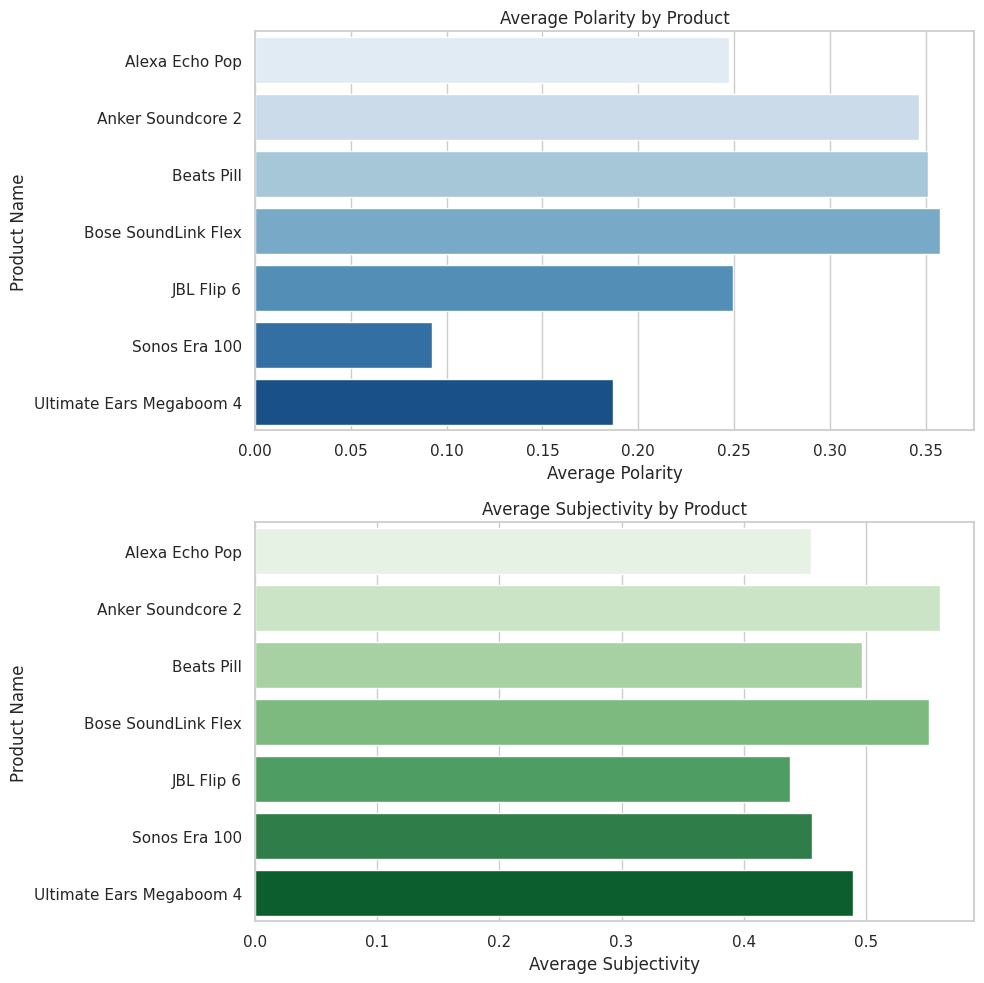

In [ ]:
review_data['Polarity'] = review_data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
review_data['Subjectivity'] = review_data['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

product_sentiment = review_data.groupby('product_name').agg({
    'Polarity': 'mean',
    'Subjectivity': 'mean'
}).reset_index()

sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x='Polarity', y='product_name', data=product_sentiment, ax=axs[0], palette='Blues')
axs[0].set_title('Average Polarity by Product')
axs[0].set_xlabel('Average Polarity')
axs[0].set_ylabel('Product Name')

sns.barplot(x='Subjectivity', y='product_name', data=product_sentiment, ax=axs[1], palette='Greens')
axs[1].set_title('Average Subjectivity by Product')
axs[1].set_xlabel('Average Subjectivity')
axs[1].set_ylabel('Product Name')

plt.tight_layout()
plt.show()

Gemini API Analysis

In [ ]:
genai.configure(api_key="secret_API_key")

# Set up model configuration
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

# Initialize the model
model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config
)

In [ ]:
api_key="secret_API_key"

In [ ]:
chat_session = model.start_chat(
  history=[
    {
      "role": "user",
      "parts": [
        "You are a market research analyst specializing in consumer electronics.\\n",
      ],
    }
  ]
)

In [ ]:
# Test different prompts
response1 = chat_session.send_message("What are the key factors customers consider when buying headphones?")
print(response1.text)

Customers consider a multitude of factors when purchasing headphones, which can be broadly categorized as follows:

**1. Sound Quality:** This is often the top priority.  Specific aspects considered include:

* **Frequency Response:** How well the headphones reproduce the full range of audible frequencies (bass, mids, treble).  Consumers look for balanced sound, or a specific emphasis depending on their musical preferences (e.g., bass-heavy for hip-hop).
* **Clarity:** The distinctness and separation of different instruments and vocals.  Muddy or unclear sound is a major deterrent.
* **Soundstage:** The sense of space and width of the sound.  Open-back headphones generally offer a wider soundstage than closed-back.
* **Distortion:**  Unwanted sounds or artifacts that detract from the original audio.

**2. Comfort and Fit:**  Especially crucial for extended listening sessions:

* **Earcup Design:** Over-ear, on-ear, or in-ear.  Over-ear generally offers better sound isolation and comfor

In [ ]:
response2 = chat_session.send_message("How would you analyze customer feedback about sound quality?")
print(response2.text)

Analyzing customer feedback about sound quality requires a structured approach to identify patterns and actionable insights. Here's a breakdown of how I would analyze such feedback:

**1. Data Collection and Aggregation:**

* **Source Identification:** Gather feedback from various sources: online reviews (Amazon, Best Buy, etc.), social media mentions, customer surveys, focus groups, and warranty claims (for potential defects).
* **Data Cleaning:**  Remove irrelevant data, duplicates, and spam.  Standardize the language to facilitate analysis.
* **Aggregation:** Group similar feedback statements together. This might involve using text mining techniques or manual categorization.

**2. Qualitative Analysis:**

* **Sentiment Analysis:** Determine the overall sentiment (positive, negative, neutral) expressed towards the sound quality.  Tools and techniques exist for automated sentiment analysis, but manual review is often necessary to capture nuances.
* **Theme Identification:** Identify r

In [ ]:
def analyze_reviews(reviews, api_key, prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    prompt = prompt_message + "\\n\\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

In [ ]:
def add_sentiment_info(df):
    # Add sentiment scores
    df['sentiment_score'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    # Categorize sentiments
    df['sentiment_category'] = df['sentiment_score'].apply(lambda x:
        'Positive' if x > 0.1
        else 'Negative' if x < -0.1
        else 'Neutral')

    return df

# Add sentiment information
wireless_reviews = add_sentiment_info(review_data)

# Quick view of sentiment distribution
print("\\nSentiment Distribution:")
print(wireless_reviews['sentiment_category'].value_counts())

\nSentiment Distribution:
sentiment_category
Positive    386
Neutral     146
Negative     25
Name: count, dtype: int64


In [ ]:
reviews = wireless_reviews['content'].head(100).tolist()

# Create your prompt
prompt_message = "Analyze the following reviews and summarize the key insights:"

# Get insights
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

The reviews reveal a mixed bag of experiences with the Beats Pill speaker.  While many praise its sound quality, portability, and ease of connection with Apple products, significant concerns emerge regarding durability, battery life, and functionality.

**Positive Aspects:**

* **Sound Quality:**  A large number of reviewers highlight the excellent sound quality, particularly the bass response, describing it as "amazing," "powerful," and "room-filling."  Many appreciate the clarity and richness of the sound, even comparing it favorably to more expensive systems.  The ability to pair two speakers for stereo sound is also a significant plus for some.
* **Portability and Design:** The small size and portability are repeatedly lauded, making it ideal for travel, the beach, or backyard use.  Many appreciate the sleek design and available color options.
* **Apple Compatibility:**  The speaker's seamless integration with Apple devices is a strong selling point for iPhone and iPad users.
* **B

In [ ]:
# Try different ways to select reviews
recent_reviews = wireless_reviews['content'].tail(50).tolist()
random_reviews = wireless_reviews['content'].sample(30).tolist()

In [ ]:
numbered_reviews = [f"{i+1}. {review}" for i, review in enumerate(reviews)]

In [ ]:
basic_prompt_1 = "Summarize the main themes in these reviews:"
basic_prompt_response_1 = analyze_reviews(reviews, api_key, basic_prompt_1)
print(basic_prompt_response_1)

These reviews reveal a mixed experience with the Beats Pill speaker, with several recurring themes:

**Positive Aspects:**

* **Sound Quality:** Many users praise the impressive sound quality, particularly the bass response, given the speaker's small size.  Several compare it favorably to other brands like JBL and Bose, highlighting its richness and clarity, even at higher volumes.  The stereo pairing feature (using two speakers) also receives positive feedback.
* **Portability and Design:** The compact and stylish design is frequently appreciated, along with its ease of carrying.  The color options also garner positive comments.
* **Apple Compatibility:**  Its seamless integration with Apple products is a major selling point for many reviewers.
* **Battery Life:** While some report battery life shorter than advertised, others highlight its impressive longevity.
* **Ease of Use:**  Most users find the speaker easy to connect and use.

**Negative Aspects:**

* **Durability and Defects:*

In [ ]:
basic_prompt_2 = "What are the most frequently mentioned features in these reviews?"
basic_prompt_response_2 = analyze_reviews(reviews, api_key, basic_prompt_2)
print(basic_prompt_response_2)

Based on the provided reviews, the most frequently mentioned features are:

**Positive:**

* **Sound quality:**  Many reviewers praise the sound quality, often mentioning "great sound," "amazing sound," "rich sound," "excellent sound," and "good bass."  The clarity and fullness of the sound are frequently highlighted, even describing it as "room-filling."
* **Battery life:**  Long battery life is repeatedly praised.  However, there are also several counterpoints noting shorter than advertised battery life.
* **Portability/Size:** The small and portable size is a major plus for many, making it convenient for travel and use in various locations.
* **Ease of connection:** Connecting to Apple devices is frequently mentioned as easy and seamless.


**Negative:**

* **Battery life (again):** While many praise the battery life, a significant number report it being far shorter than expected or advertised.
* **Connectivity issues:** Several reviewers mention problems with the speaker disconnect

In [ ]:
basic_prompt_3 = "Identify the common positive and negative points in these reviews:"
basic_prompt_response_3 = analyze_reviews(reviews, api_key, basic_prompt_3)
print(basic_prompt_response_3)

Based on the reviews, here's a summary of the common positive and negative points for the Beats Pill speaker:

**Positive Points:**

* **Sound Quality:** Many reviewers praise the sound quality, particularly the bass response, describing it as "amazing," "powerful," "rich," and "room-filling" for its size.  Many compare it favorably to other brands.  The "lossless listening" (direct connection) feature is also appreciated by some.
* **Portability and Design:** The compact size and portability are frequently highlighted as positives.  Reviewers appreciate its ease of carrying around. The sleek design and available color options are also mentioned favorably.
* **Ease of Use/Connectivity:**  Most find it easy to connect to Apple devices (though some note challenges connecting to Android initially).  The pairing process with another Beats Pill for stereo sound is appreciated (though setup steps aren't always intuitive).
* **Battery Life:** While some report shorter battery life than advert

In [ ]:
def analyze_basic_product(reviews, product_name):
    prompt_message = f"""Analyze these reviews for {product_name}:
    1. What are the top 3 most mentioned features?
    2. What do customers love most about this product?
    3. What are the most common complaints?

    Please provide specific examples from the reviews."""

    return analyze_reviews(reviews, api_key, prompt_message)

# Example: Analyze a single product
product_reviews = wireless_reviews[wireless_reviews['product_name'] == 'Beats Pill']['content'].tolist()[:30]
basic_insights = analyze_basic_product(product_reviews, 'Beats Pill')
print(basic_insights)

Based on the provided reviews, here's an analysis of the Beats Pill:

**1. Top 3 Most Mentioned Features:**

1. **Sound Quality:**  Many reviewers explicitly praise the sound quality, using terms like "excellent," "amazing," "sounds great," "big sound," and "room of sound."  Several mention the bass ("base really hits").

2. **Portability/Convenience:** The speaker's portability and ease of use are frequently highlighted.  Reviewers appreciate its size ("travel size," "easily mobile"), ease of connection to Apple products ("Works great with my iPhone!"), and suitability for various locations ("great for the beach or backyard").

3. **Loudness:** While some found it not loud *enough*, many others emphasized its loudness as a positive, describing it as "so loud," "very loud,"  and implying it exceeded expectations.


**2. What Customers Love Most About This Product:**

Customers overwhelmingly love the Beats Pill's combination of excellent sound quality and convenient portability.  The s

In [ ]:
def analyze_sentiment_patterns(reviews, sentiment_category, product_name):
    prompt_message = f"""Analyze these {sentiment_category.lower()} reviews for {product_name}:
    1. What specific aspects create {sentiment_category.lower()} reactions?
    2. Identify common phrases or descriptions used
    3. Note any comparisons with competitor products
    4. Find unexpected or unique feedback

    Support your analysis with specific examples."""

    return analyze_reviews(reviews, api_key, prompt_message)

# Example: Analyze positive reviews for a product
positive_Bose_reviews = wireless_reviews[
    (wireless_reviews['product_name'] == 'Bose SoundLink Flex') &
    (wireless_reviews['sentiment_category'] == 'Positive')
]['content'].tolist()[:30]

positive_insights = analyze_sentiment_patterns(
    positive_reviews,
    'Positive',
    'Bose SoundLink Flex'
)
print(positive_insights)

Analyzing the provided text, which appears to be a jumbled collection of positive reviews for the Bose SoundLink Flex, is challenging due to its lack of proper formatting and sentence structure.  The text is largely a string of words and phrases, making a detailed analysis difficult.  However, I can offer some observations based on recurring patterns:


**1. Specific Aspects Creating Positive Reactions:**

Based on the fragmented words, the positive reactions seem to center around:

* **Sound quality:**  Many phrases allude to "good sound," "great sound," "amazing sound,"  "awesome sound,"  and "perfect sound."  The repeated mention of "amazing" and "awesome" indicate a strong positive response.

* **Portability/Durability:** Words like "compact," "small," "lightweight," "durable," and "tough" appear repeatedly, suggesting users appreciate its ease of carrying and resilience. The phrase "perfect for travel" also likely appears (though hard to say for certain given the formatting).

* *

In [ ]:
negative_Alexa_reviews = wireless_reviews[
    (wireless_reviews['product_name'] == 'Alexa Echo Pop') &
    (wireless_reviews['sentiment_category'] == 'Negative')
]['content'].tolist()[:30]

negative_insights = analyze_sentiment_patterns(
    negative_Alexa_reviews,
    'Negative',
    'Alexa Echo Pop'
)
print(negative_insights)

Let's analyze these Alexa Echo Pop reviews:

**1. Specific Aspects Creating Negative Reactions:**

* **Poor Speaker Quality/Durability:** The most prominent negative aspect is the Echo Pop's speaker's unreliability.  One reviewer explicitly states the speaker blew after a few months, rendering it useless for its intended purpose (playing music and sleep sounds).  This points to a significant quality control issue.

* **Lack of Refund/Replacement Process:**  Reviewers express frustration with Amazon's customer service and return/refund process. One reviewer mentions receiving a faulty product and not receiving a refund after returning it. This suggests difficulties navigating the return policy and a lack of effective customer support.

* **Dependence on Amazon Ecosystem:**  One review highlights the Echo Pop's limitations without an Amazon account. This restricts usability for individuals who prefer not to use Amazon services or already have accounts with competing services.

* **Diffic

In [ ]:
def analyze_comparative_reviews(reviews_dict):
    # Combine all product names for the prompt
    products_list = ", ".join(reviews_dict.keys())

    prompt_message = f"""Compare customer feedback across these products: {products_list}

    For each product, analyze:
    1. Standout features and unique selling points
    2. Common complaints or limitations
    3. Price-to-value perception
    4. Target user preferences

    Then compare:
    1. Key differences in customer satisfaction
    2. Feature preferences across products
    3. Quality and reliability mentions

    Format as a structured comparison with specific examples."""

    # Combine reviews with product labels
    combined_reviews = []
    for product, reviews in reviews_dict.items():
        labeled_reviews = [f"[{product}] {review}" for review in reviews]
        combined_reviews.extend(labeled_reviews[:20])  # Take first 20 reviews per product

    return analyze_reviews(combined_reviews, api_key, prompt_message)

# Example: Compare two products
products_to_compare = ['Anker Soundcore 2', 'Ultimate Ears Megaboom 4', 'JBL Flip 6', 'Sonos Era 100', 'Bose SoundLink Flex', 'Alexa Echo Pop']
reviews_dict = {}
for product in products_to_compare:
    reviews = wireless_reviews[wireless_reviews['product_name'] == product]['content'].tolist()[:20]
    reviews_dict[product] = reviews

comparison_insights = analyze_comparative_reviews(reviews_dict)
print(comparison_insights)

## Bluetooth Speaker Customer Feedback Comparison:

This comparison analyzes customer feedback for six Bluetooth speakers: Anker Soundcore 2, Ultimate Ears Megaboom 4, JBL Flip 6, Sonos Era 100, Bose SoundLink Flex, and Amazon Echo Pop.  The analysis is based on the provided reviews and focuses on identifying trends rather than precise quantification.

**Product-Specific Analysis:**

**1. Anker Soundcore 2:**

* **Standout Features:**  Exceptional battery life, ease of use, surprisingly good sound quality for its size and price, compact and lightweight.  Some users highlighted the built-in microphone as a bonus.
* **Common Complaints:**  Limited volume, not suitable for large rooms, occasional reported defects (though customer service was praised in one instance).
* **Price-to-Value:**  High perceived value for the price, especially when purchased on sale.  Direct comparisons to more expensive JBL speakers were made, emphasizing the cost savings.
* **Target User:** Budget-conscious con

In [ ]:
def analyze_feature(reviews, feature_name):
    prompt_message = f"""Analyze mentions of {feature_name} in these reviews:
    1. How do customers describe the {feature_name}?
    2. What specific aspects are praised or criticized?
    3. How does {feature_name} compare across products?
    4. What improvements do customers suggest?

    Include specific quotes and examples."""

    return analyze_reviews(reviews, api_key, prompt_message)

# Example: Analyze battery life mentions
battery_reviews = wireless_reviews[
    wireless_reviews['content'].str.contains('battery|charge|power', case=False, na=False)
]['content'].tolist()[:40]

battery_insights = analyze_feature(battery_reviews, "battery life")
print(battery_insights)

Here's an analysis of the battery life mentions in the provided reviews:

**1. How do customers describe the battery life?**

Customers use a wide range of descriptions, from overwhelmingly positive to extremely negative.  Positive descriptions include: "very long," "lasts a long time," "amazing," "lasts several days," "holds a charge for a great length of time," "excellent," and "long lasting." Negative descriptions include:  "not as advertised," "at the most 3 hours," "poor," and "decent" (which is lukewarm).  Some users mention the battery life deteriorating over time in their older models.

**2. What specific aspects are praised or criticized?**

* **Praise:**  Many praise the longevity of the charge, with some reporting several days of use on a single charge.  The fast charging speed is also mentioned positively.

* **Criticism:** The most common criticism is that the battery life doesn't meet advertised claims ("battery life not as advertised," "Does not stay charged up to 24 hou